In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))

from src.main.utils.load_scenarios import load_scenario
from src.main.environment.food_delivery_gym_env import FoodDeliveryGymEnv

DIR_PATH = "data/ppo_training/obj_3/complex_scenario/13000000_time_steps/"
SCENARIOS_PATH = os.path.abspath(os.path.join(os.getcwd(), "../../scenarios/"))

In [10]:
gym_env: FoodDeliveryGymEnv = load_scenario("complex.json", dir_path=SCENARIOS_PATH)

In [16]:
# Carregar os dados do Monitor para análise
log_data = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), "../../", DIR_PATH, "logs/monitor.csv")), skiprows=1)
display(log_data)

,r,l,t
0,-346306.0,576,1.895293
1,-355625.0,576,2.537308
2,-348885.0,576,3.167156
3,-371196.0,576,4.585775
4,-228485.0,576,5.242150
...,...,...,...
22565,-270415.0,576,34953.192714
22566,-354130.0,576,34954.049599
22567,-495454.0,576,34955.257843
22568,-474018.0,576,34955.893388


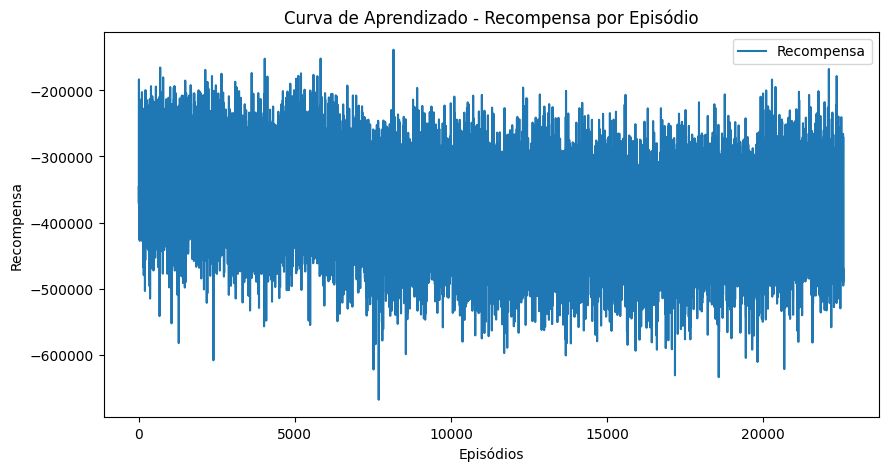

In [12]:
# Plotar recompensa acumulada por episódio
retornos = log_data["r"].values 
plt.figure(figsize=(10, 5))
plt.plot(retornos, label="Recompensa")
plt.xlabel("Episódios")
plt.ylabel("Recompensa")
plt.title("Curva de Aprendizado - Recompensa por Episódio")
plt.legend()
plt.show()

In [13]:
# Calcular a média e o desvio padrão a cada mil episódios
media_1000_episodios = []
desvio_1000_episodios = []
for i in range(1000, len(retornos), 1000):
    media_1000_episodios.append(np.mean(retornos[i-1000:i]))
    desvio_1000_episodios.append(np.std(retornos[i-1000:i]))
media_1000_episodios = np.array(media_1000_episodios)
desvio_1000_episodios = np.array(desvio_1000_episodios)

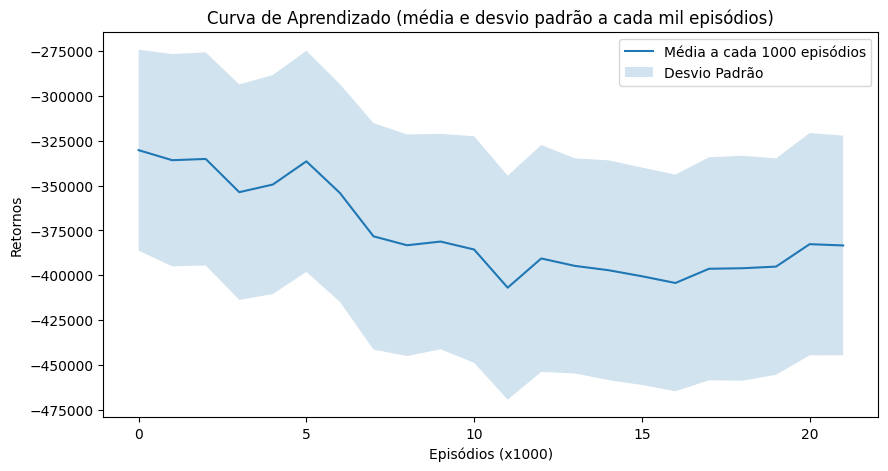

In [14]:
# Plotar a curva de aprendizado com a média e o desvio padrão
plt.figure(figsize=(10, 5))
plt.plot(media_1000_episodios, label="Média a cada 1000 episódios")
plt.fill_between(range(len(media_1000_episodios)), media_1000_episodios - desvio_1000_episodios, media_1000_episodios + desvio_1000_episodios, alpha=0.2, label="Desvio Padrão")
plt.title('Curva de Aprendizado (média e desvio padrão a cada mil episódios)')
plt.xlabel('Episódios (x1000)')
plt.ylabel('Retornos')
plt.legend()
plt.show()

In [20]:
# Plotar a recompensa acumulada por passo
step_rewards_df = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), "../../", DIR_PATH, "logs/step_rewards.csv")))
display(step_rewards_df)

,reward
0,-35.0
1,0.0
2,-33.0
3,-16.0
4,-21.0
...,...
13000699,-1294.0
13000700,0.0
13000701,-876.0
13000702,-1312.0


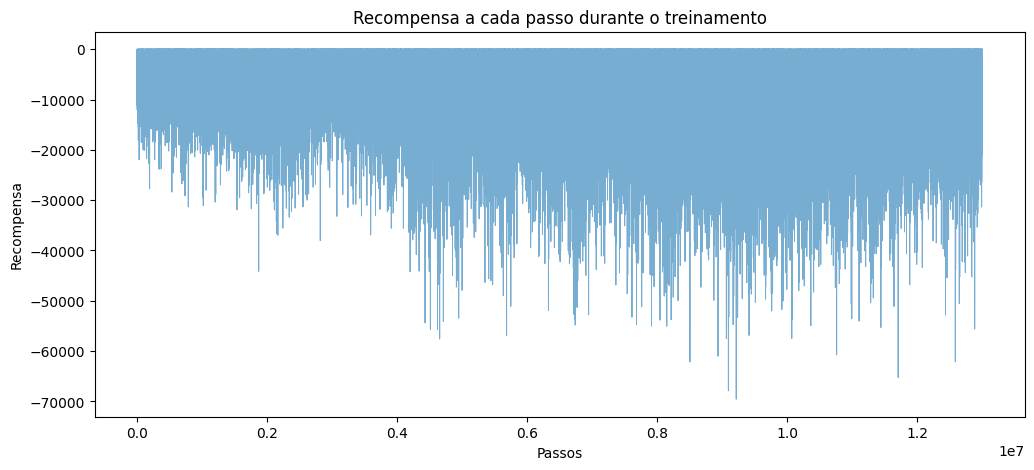

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(step_rewards_df["reward"], alpha=0.6, linewidth=0.7)
plt.xlabel("Passos")
plt.ylabel("Recompensa")
plt.title("Recompensa a cada passo durante o treinamento")
plt.show()

In [30]:
# Plotar a tendência de recompensa ao longo do episódio
step_rewards = step_rewards_df["reward"].values

episode_length = gym_env.num_orders

# Quebrar o vetor em episódios (cada um com EPISODE_LENGTH passos)
num_episodes = len(step_rewards) // episode_length
step_matrix = step_rewards[:num_episodes * episode_length].reshape((num_episodes, episode_length))

# Calcular a média e desvio padrão em cada posição do episódio
mean_rewards = step_matrix.mean(axis=0)
std_rewards = step_matrix.std(axis=0)

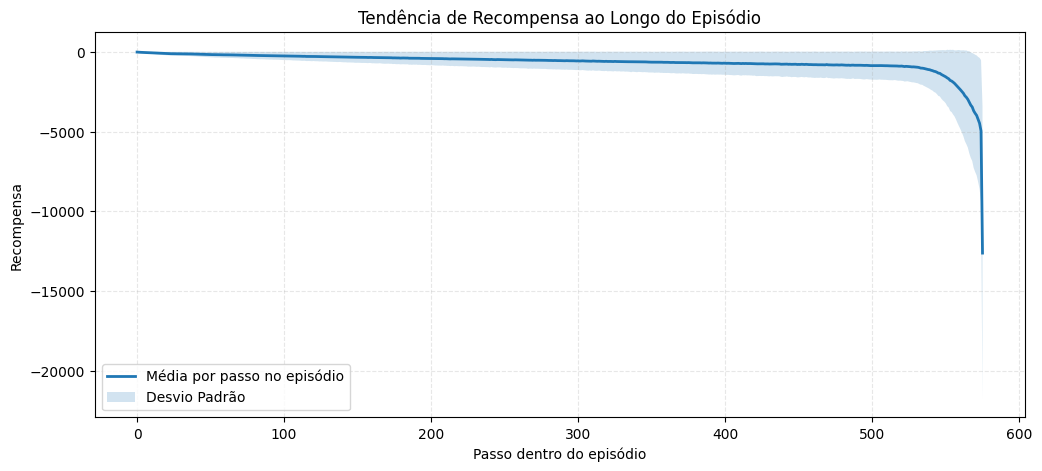

In [31]:
# Plotar
plt.figure(figsize=(12, 5))
plt.plot(mean_rewards, label="Média por passo no episódio", linewidth=2)
plt.fill_between(range(episode_length), mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2, label="Desvio Padrão")
plt.xlabel("Passo dentro do episódio")
plt.ylabel("Recompensa")
plt.title("Tendência de Recompensa ao Longo do Episódio")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [36]:
step_matrix = step_rewards[7500*576:8000*576].reshape((8000-7500, episode_length))

mean_rewards = step_matrix.mean(axis=0)
std_rewards = step_matrix.std(axis=0)
min_rewards = step_matrix.min(axis=0)

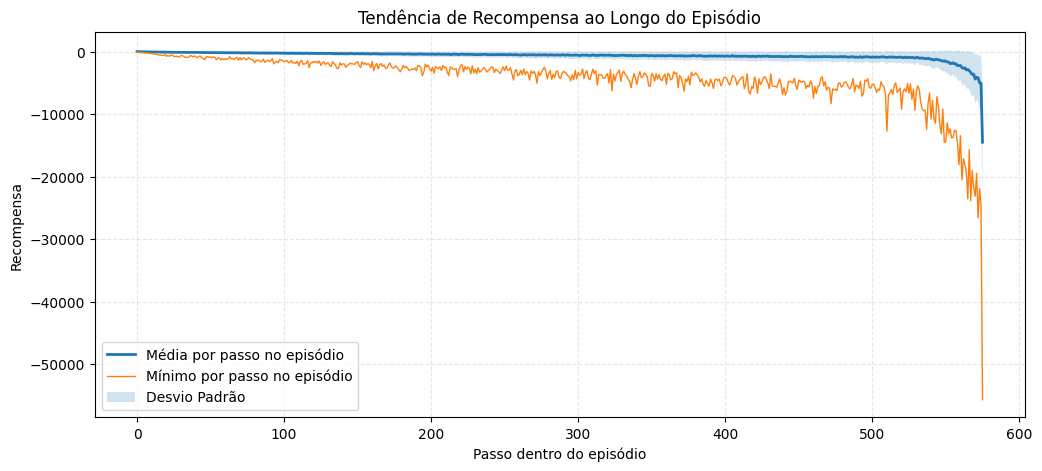

In [37]:
# Plotar
plt.figure(figsize=(12, 5))
plt.plot(mean_rewards, label="Média por passo no episódio", linewidth=2)
plt.plot(min_rewards, label="Mínimo por passo no episódio", linewidth=1)
plt.fill_between(range(episode_length), mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2, label="Desvio Padrão")
plt.xlabel("Passo dentro do episódio")
plt.ylabel("Recompensa")
plt.title("Tendência de Recompensa ao Longo do Episódio")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()